<h1>Original Perceptron own build</h1>

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

SEED = 0

In [114]:
def initialisation(X):
    """
        Initialize w and b parameters.
        Return W vector.
    """
    W = np.random.randn(X.shape[1], 1) #if X is of shape (m, 2) thus W must be of shape (2, 1)
    b = np.random.randn(1)
    
    return (W, b)

def model(X, W, b):
    """
        Compute the Z value and the activation function.
    """
    Z = X.dot(W) + b
    A = 1/(1 + np.exp(-Z))
    
    return A

def cost(A, Y):
    """
        Compute the log loss between predicted value/class and true target value.
    """
    return (-1/len(Y))*np.sum(Y*np.log(A) + (1 - Y)*np.log(1 - A))

def gradient(A, X, Y):
    """
        Compute the gradient of the cost function.
    """
    dw = (1/len(Y))*np.dot(X.T, (A - Y))
    db = (1/len(Y))*np.sum(A - Y)
    
    return (dw, db)

def update(W, b, dW, db, learning_rate):
    """
        Update the w parameters and the b parameter.
    """
    W = W - learning_rate*dW
    b = b - learning_rate*db
    
    return W, b

def predict(X, W, b):
    a = model(X, W, b)
    return a >= 0.5
    
def perceptron(X, Y, learning_rate=0.1, n_iter=100):
    W, b = initialisation(X)
    loss = []
    for i in range(n_iter):
        A = model(X, W, b)
        loss.append(cost(A, Y))
        dW, db = gradient(A, X, Y)
        W, b = update(W, b, dW, db, learning_rate)
        
    y_pred = predict(X, W, b)
    acc = accuracy_score(Y, y_pred)
    
    return loss, y_pred, acc

(100, 2)
(100, 1)


Text(0, 0.5, 'X2')

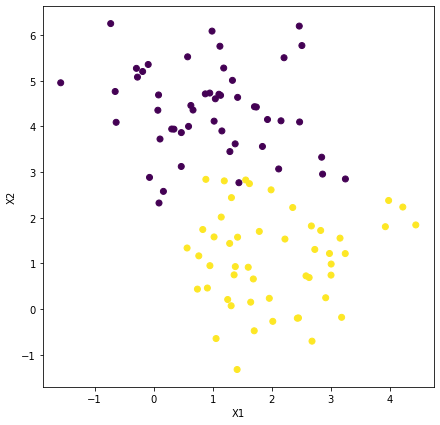

In [115]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=SEED)
print(X.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

figure = plt.figure(figsize=(7, 7))
ax = figure.add_subplot(1, 1, 1)
ax.scatter(x=X[:, 0], y=X[:, 1], c=y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

Text(0, 0.5, 'loss value')

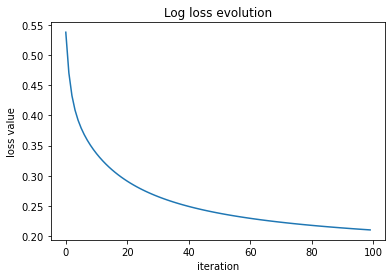

In [117]:
loss, y_pred, acc = perceptron(X, y)

figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.plot(loss)
ax.set_title('Log loss evolution')
ax.set_xlabel('iteration')
ax.set_ylabel('loss value')